In [18]:
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)


# Reading data into pandas dataframe
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Displaying few records of data
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [2]:
# Column data types and non missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [25]:
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # select columns that should be a number
    if('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        # convert the data type to float
        data[col] = data[col].astype(float)

In [4]:
# data types after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
Latitude,2263,19.3
Longitude,2263,19.3
Community Board,2263,19.3
Council District,2263,19.3
Census Tract,2263,19.3
NTA,2263,19.3
Street Number,124,1.1
Street Name,122,1.0
Borough,118,1.0
DOF Gross Floor Area,118,1.0


In [9]:
# Get columns with > 50% missing
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)

print("We will remove %d columns." % len(missing_columns))

Your selected dataframe has 60 columns.
There are 13 columns that have missing values.
We will remove 0 columns.


In [10]:
# Drop the columns
data = data.drop(columns= list(missing_columns))

Text(0.5,1,'Enery Star Score Distribution')

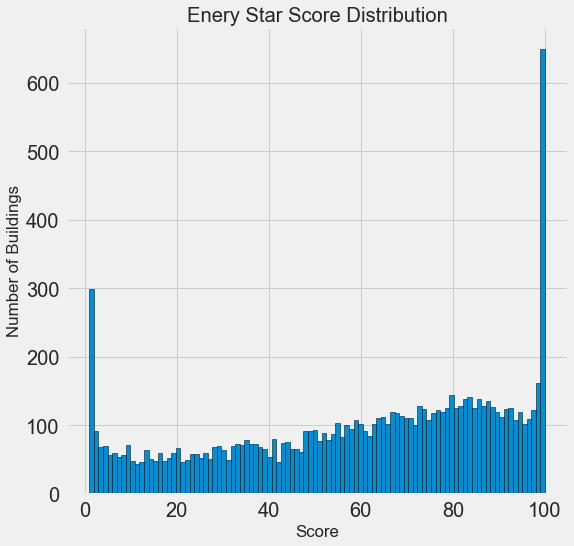

In [27]:
figsize(8,8)

# Rename the score
data = data.rename(columns= {'ENERGY STAR Score': 'Score'})

# Histogram of Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['Score'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Enery Star Score Distribution')

Text(0.5,1,'Site EUI Distribution')

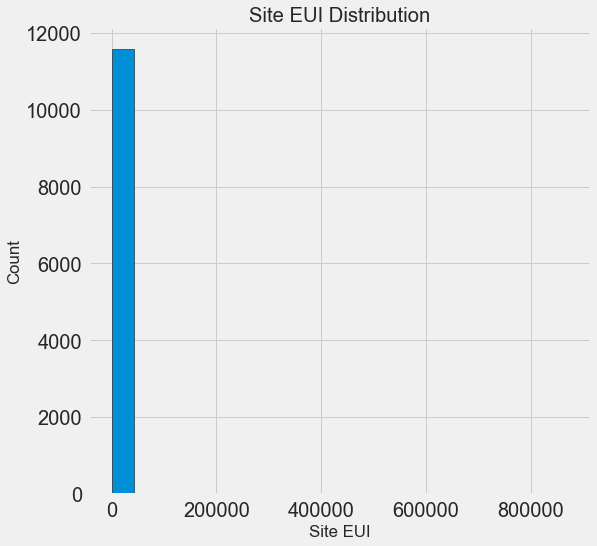

In [29]:
# Histogram of plot of Site EUI
figsize(8,8)

plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Site EUI")
plt.ylabel("Count")
plt.title("Site EUI Distribution")

In [30]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [31]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [32]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265.0]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,NaN,...,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [34]:
# Removing outliers
# Calculate first and third quartiles
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartle = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartle - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3*iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartle + 3*iqr))]

Text(0.5,1,'Site EUI Distribution')

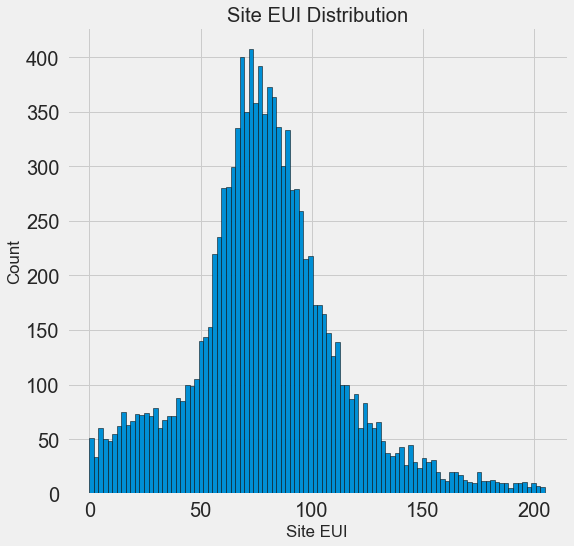

In [37]:
# Histogram of plot of Site EUI after removing outliers
figsize(8,8)

plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=100, edgecolor='black')
plt.xlabel("Site EUI")
plt.ylabel("Count")
plt.title("Site EUI Distribution")

In [41]:
# Create a list of Boroughs with more than 100observations
boroughs = data.dropna(subset=['Score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5,1,'Density plot of Energy Star Scoers by Borough')

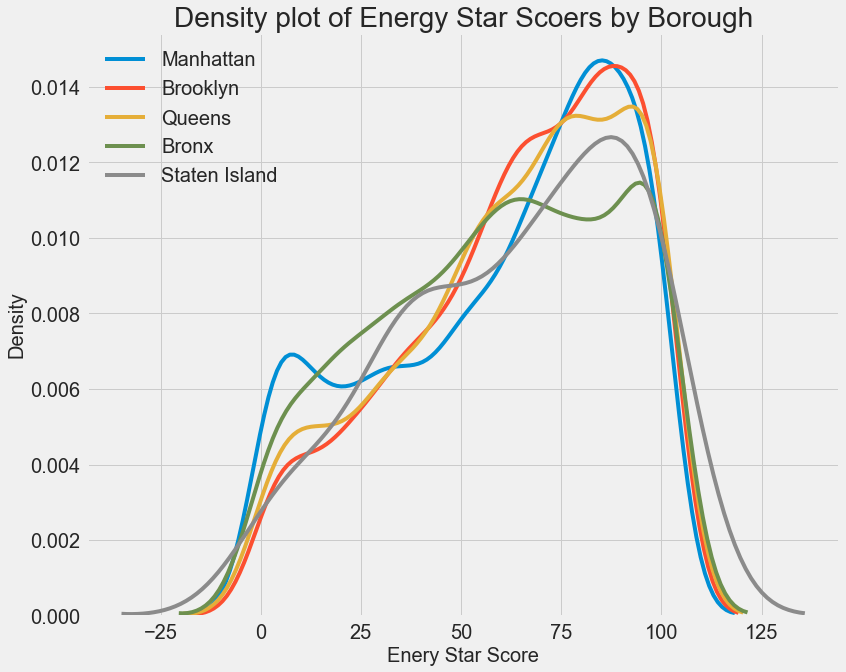

In [44]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution od Scores
for borough in boroughs:
    # select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['Score'].dropna(), label=borough)
    
# label the plot
plt.xlabel('Enery Star Score',size=20)
plt.ylabel('Density', size=20)
plt.title('Density plot of Energy Star Scoers by Borough', size=28)

In [45]:
# Correlation coefficient betweenall variables and the score
correlation_data = data.corr()['Score'].sort_values()

## Print the most -ve correlation
print(correlation_data.head(15), '\n')

# Print the most +ve correlation
print(correlation_data.tail(15))

Fuel Oil #1 Use (kBtu)                                       -0.890588
Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Fuel Oil #4 Use (kBtu)                                       -0.205467
Fuel Oil #5 & 6 Use (kBtu)                                   -0.189791
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Fuel Oil #2 Use (kBtu)                                       -0.130504
Year Built                                                   -0.121249
Total 

In [61]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'Score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['Score'])

# Find correlations with the score 
correlations = features.corr()['Score'].dropna().sort_values()

C:\Users\RishabhChaudhary\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RishabhChaudhary\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\RishabhChaudhary\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero enc

In [62]:
# Display most negative correlations
correlations.head(15)

sqrt_Fuel Oil #1 Use (kBtu)                     -0.905285
Fuel Oil #1 Use (kBtu)                          -0.890588
log_Fuel Oil #1 Use (kBtu)                      -0.885060
Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt_Site EUI (kBtu/ft²)                        -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671044
sqrt_Source EUI (kBtu/ft²)                      -0.669396
Weather Normalized Source EUI (kBtu/ft²)        -0.645542
Source EUI (kBtu/ft²)                           -0.641037
log_Source EUI (kBtu/ft²)                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)    -0.620329
log_Site EUI (kBtu/ft²)                         -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)      -0.601332
Name: Score, dtype: float64

In [50]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

### Two Variable Plots 

Text(0.5,1,'Energy Star Score vs Site EUI')

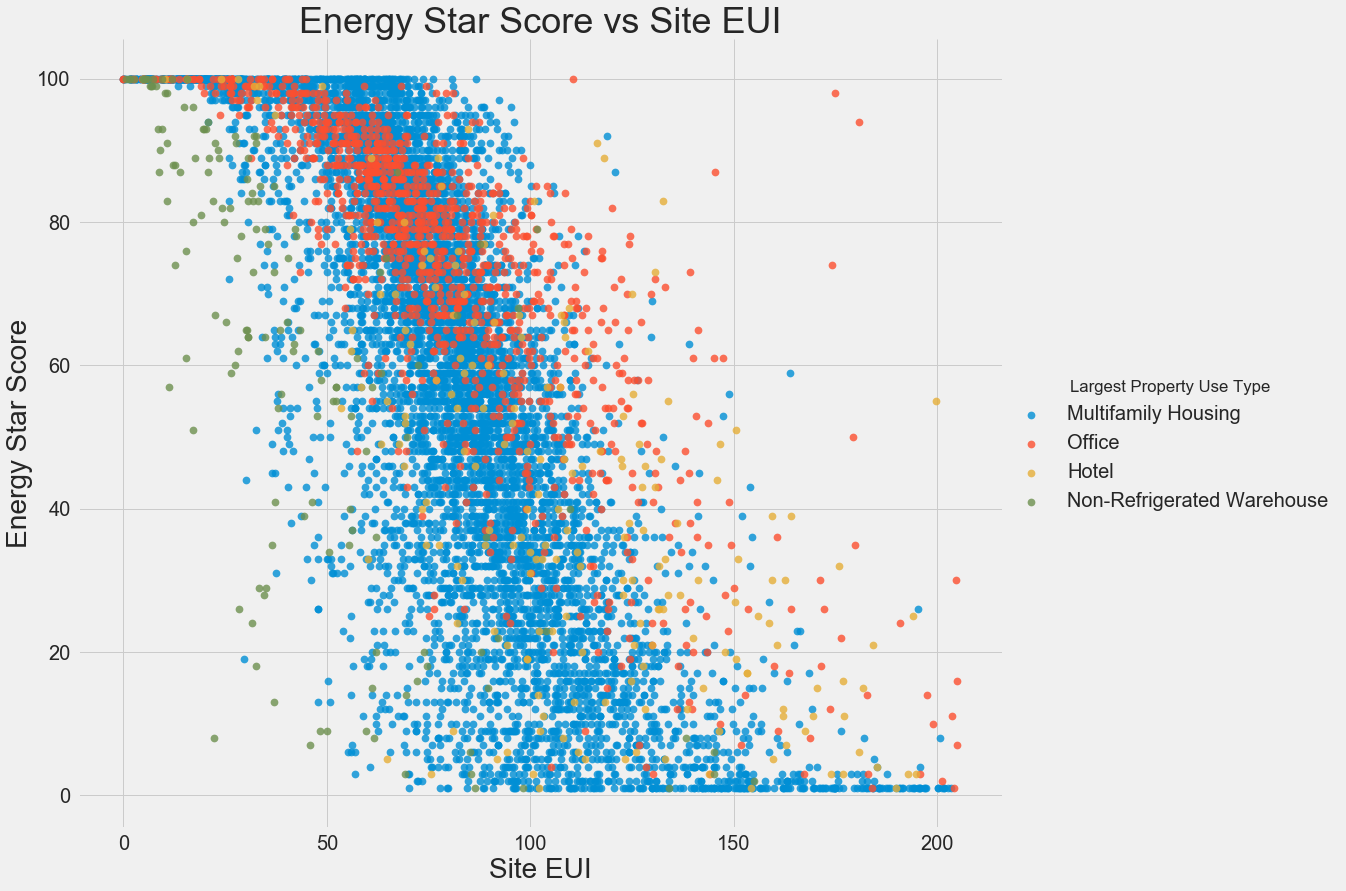

In [71]:
figsize(12, 10)

# Extract the Building types
features['Largest Property Use Type'] = data.dropna(subset=['Score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'Score', 
           hue='Largest Property Use Type', data=features, scatter_kws={'alpha':0.8, 's':60}, 
           fit_reg=False, size=12, aspect=1.2)

# Label the plot
plt.xlabel('Site EUI', size=28)
plt.ylabel('Energy Star Score', size=28)
plt.title('Energy Star Score vs Site EUI', size=36)

### Pair Plots 

C:\Users\RishabhChaudhary\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


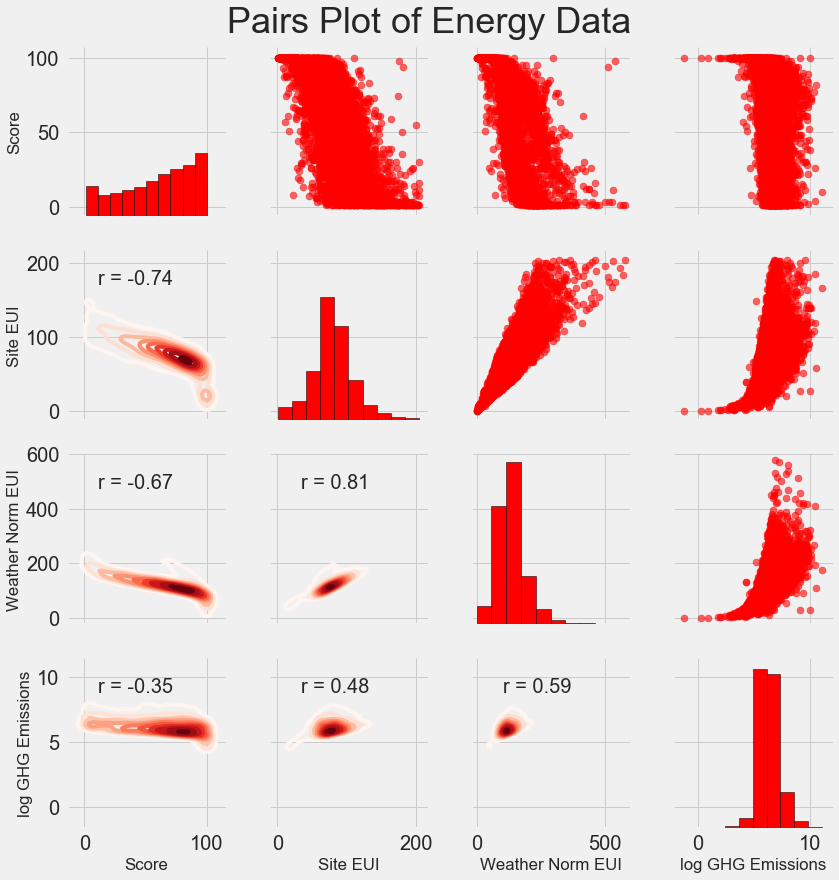

In [55]:
# Extract the columns to  plot
plot_data = features[['Score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

In [72]:
features.shape

(8979, 163)

Text(0.5,1,'Weather Norm EUI vs Site EUI, R = 0.9968')

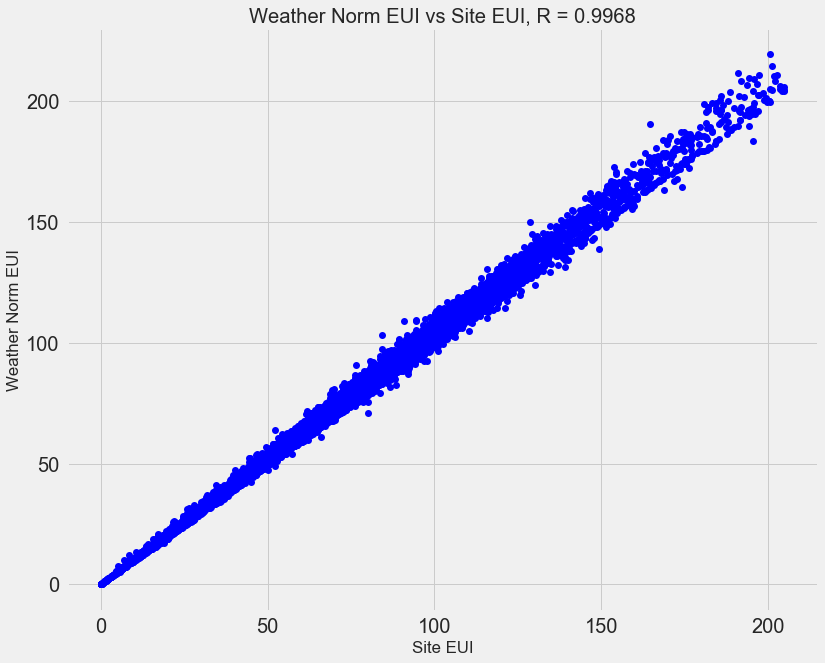

In [75]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)',
                                                                        'Site EUI (kBtu/ft²)']].dropna(),
                                                                  rowvar=False)[0][1])

### Removing colinear features 

In [95]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    # Dont want to remove correlation between Energy Star Score
    y = x['Score']
    x = x.drop(columns=['Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns)-1)
    drop_cols = []
    
    # Iterate throough the correlation matrix and compare correlatios
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
    
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    x = x.drop(columns= ['Weather Normalized Site EUI (kBtu/ft²)','Largest Property Use Type - Gross Floor Area (ft²)'])
    # Not working for:  "Water Use (All Water Sources) (kgal)", 'log_Water Use (All Water Sources) (kgal)', 
    
    # Add the score back into the data
    x['Score'] = y
    
    return x

In [96]:
# Remove the collinear features above a specified correlation coiefficient
features = remove_collinear_features(features, 0.6)
#for i in features.keys():
#    print(i)
#features['Largest Property Use Type - Gross Floor Area (ft²)']

Weather Normalized Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 0.81
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.79
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.83
Fuel Oil #1 Use (kBtu) | 2nd Largest Property Use - Gross Floor Area (ft²) | 1.0
Fuel Oil #1 Use (kBtu) | Site EUI (kBtu/ft²) | 0.85
Fuel Oil #1 Use (kBtu) | Weather Normalized Site EUI (kBtu/ft²) | 0.95
Fuel Oil #5 & 6 Use (kBtu) | 3rd Largest Property Use Type - Gross Floor Area (ft²) | 0.61
Diesel #2 Use (kBtu) | 2nd Largest Property Use - Gross Floor Area (ft²) | 0.63
Diesel #2 Use (kBtu) | 3rd Largest Property Use Type - Gross Floor Area (ft²) | 0.69
Diesel #2 Use (kBtu) | Weather Normalized Site Natural Gas Intensity (therms/ft²) | 0.62
Diesel #2 Use (kBtu) | Fuel Oil #2 Use (kBtu) | 1.0
District Steam Use (kBtu) | DOF Gross Floor Area | 0.82
District Steam Use (kBtu) | Largest Property Use Type - Gross Floor Area (ft²)

C:\Users\RishabhChaudhary\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater_equal


Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 0.79
Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.77
Source EUI (kBtu/ft²) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.84
Source EUI (kBtu/ft²) | Weather Normalized Source EUI (kBtu/ft²) | 1.0
Source EUI (kBtu/ft²) | Fuel Oil #1 Use (kBtu) | 0.61
Latitude | Fuel Oil #1 Use (kBtu) | 0.62
Council District | Order | 0.87
Council District | Latitude | 0.69
Census Tract | Diesel #2 Use (kBtu) | 0.69
sqrt_Order | Order | 0.98
sqrt_Order | Council District | 0.8
log_Order | Order | 0.89
log_Order | Council District | 0.66
sqrt_Property Id | Property Id | 1.0
log_Property Id | Property Id | 0.93
sqrt_DOF Gross Floor Area | DOF Gross Floor Area | 0.87
sqrt_DOF Gross Floor Area | Largest Property Use Type - Gross Floor Area (ft²) | 0.82
sqrt_DOF Gross Floor Area | District Steam Use (kBtu) | 0.77
sqrt_DOF Gross Floor Area | Electricity Use - Grid Purchase (kBtu) | 0.73
sqrt_DOF Gross Floor Area | Weather Normal

sqrt_Fuel Oil #5 & 6 Use (kBtu) | Weather Normalized Site Natural Gas Intensity (therms/ft²) | 0.61
sqrt_Fuel Oil #5 & 6 Use (kBtu) | Fuel Oil #5 & 6 Use (kBtu) | 0.91
sqrt_Fuel Oil #5 & 6 Use (kBtu) | sqrt_Weather Normalized Site Natural Gas Intensity (therms/ft²) | 0.64
sqrt_Fuel Oil #5 & 6 Use (kBtu) | log_Weather Normalized Site Natural Gas Intensity (therms/ft²) | 0.63
log_Fuel Oil #5 & 6 Use (kBtu) | Fuel Oil #2 Use (kBtu) | 0.97
log_Fuel Oil #5 & 6 Use (kBtu) | Fuel Oil #5 & 6 Use (kBtu) | 0.73
log_Fuel Oil #5 & 6 Use (kBtu) | sqrt_Fuel Oil #2 Use (kBtu) | 0.94
log_Fuel Oil #5 & 6 Use (kBtu) | log_Fuel Oil #2 Use (kBtu) | 0.89
sqrt_Diesel #2 Use (kBtu) | Fuel Oil #2 Use (kBtu) | 1.0
sqrt_Diesel #2 Use (kBtu) | Diesel #2 Use (kBtu) | 0.97
sqrt_Diesel #2 Use (kBtu) | sqrt_Weather Normalized Site Natural Gas Intensity (therms/ft²) | 0.65
sqrt_Diesel #2 Use (kBtu) | sqrt_Fuel Oil #2 Use (kBtu) | 1.0
log_Diesel #2 Use (kBtu) | DOF Gross Floor Area | 0.9
log_Diesel #2 Use (kBtu) | Lar

log_Electricity Use - Grid Purchase (kBtu) | Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.71
log_Electricity Use - Grid Purchase (kBtu) | Electricity Use - Grid Purchase (kBtu) | 0.64
log_Electricity Use - Grid Purchase (kBtu) | Weather Normalized Site Electricity (kWh) | 0.65
log_Electricity Use - Grid Purchase (kBtu) | Total GHG Emissions (Metric Tons CO2e) | 0.64
log_Electricity Use - Grid Purchase (kBtu) | Indirect GHG Emissions (Metric Tons CO2e) | 0.6
log_Electricity Use - Grid Purchase (kBtu) | sqrt_DOF Gross Floor Area | 0.73
log_Electricity Use - Grid Purchase (kBtu) | log_DOF Gross Floor Area | 0.78
log_Electricity Use - Grid Purchase (kBtu) | sqrt_Largest Property Use Type - Gross Floor Area (ft²) | 0.73
log_Electricity Use - Grid Purchase (kBtu) | log_Largest Property Use Type - Gross Floor Area (ft²) | 0.77
log_Electricity Use - Grid Purchase (kBtu) | sqrt_Weather Normalized Site Electricity Intensity (kWh/ft²) | 0.78
log_Electricity Use - Grid Purchase (kBt

sqrt_Property GFA - Self-Reported (ft²) | sqrt_District Steam Use (kBtu) | 0.8
sqrt_Property GFA - Self-Reported (ft²) | sqrt_Electricity Use - Grid Purchase (kBtu) | 0.85
sqrt_Property GFA - Self-Reported (ft²) | log_Electricity Use - Grid Purchase (kBtu) | 0.75
sqrt_Property GFA - Self-Reported (ft²) | sqrt_Weather Normalized Site Electricity (kWh) | 0.85
sqrt_Property GFA - Self-Reported (ft²) | log_Weather Normalized Site Electricity (kWh) | 0.75
sqrt_Property GFA - Self-Reported (ft²) | sqrt_Total GHG Emissions (Metric Tons CO2e) | 0.9
sqrt_Property GFA - Self-Reported (ft²) | log_Total GHG Emissions (Metric Tons CO2e) | 0.78
sqrt_Property GFA - Self-Reported (ft²) | sqrt_Indirect GHG Emissions (Metric Tons CO2e) | 0.82
log_Property GFA - Self-Reported (ft²) | DOF Gross Floor Area | 0.65
log_Property GFA - Self-Reported (ft²) | Largest Property Use Type - Gross Floor Area (ft²) | 0.68
log_Property GFA - Self-Reported (ft²) | District Steam Use (kBtu) | 0.66
log_Property GFA - Self

Largest Property Use Type_Office | Largest Property Use Type_Multifamily Housing | 0.85


In [97]:
features.shape

(8979, 69)

In [98]:
# Remove any column with all na values
features = features.dropna(axis=1, how='all')
features.shape

(8979, 67)

12        93.0
18        72.0
19        67.0
20        80.0
21       100.0
22       100.0
23       100.0
30        40.0
31        67.0
32        99.0
33        12.0
34        88.0
36       100.0
40       100.0
55        73.0
56       100.0
59        71.0
88       100.0
97        74.0
100       84.0
101       78.0
102       78.0
103       81.0
114      100.0
116      100.0
117      100.0
118      100.0
145        1.0
157      100.0
159      100.0
         ...  
11696    100.0
11697     31.0
11700     46.0
11702     56.0
11703     84.0
11704     38.0
11705     63.0
11706      3.0
11709     34.0
11710     41.0
11711     30.0
11713     70.0
11715     89.0
11717     93.0
11721     97.0
11725     80.0
11730    100.0
11731    100.0
11734     79.0
11735      8.0
11736     83.0
11737     83.0
11738    100.0
11739     99.0
11740     86.0
11741     98.0
11742     16.0
11743     83.0
11744     92.0
11745     19.0
Name: Score, Length: 8979, dtype: float64